# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
pd.options.mode.chained_assignment = None

import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

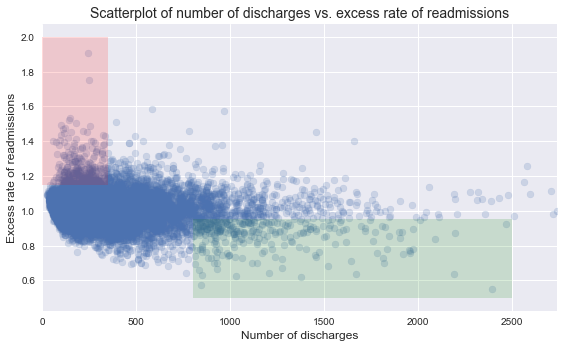

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [35]:
# Analysis of analysis/recommendations

print("Correlation")
print("===========")
corr_value, corr_pvalue = stats.pearsonr(clean_hospital_read_df['Number of Discharges'][81:-3],clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
print("Correlation coefficient:", corr_value)
print("p-value:", corr_pvalue)
print("Sample size:", len(clean_hospital_read_df['Number of Discharges'][81:-3]))

Correlation
Correlation coefficient: -0.0930955428759
p-value: 1.50227564265e-23
Sample size: 11494


<i>While there is indeed statistical significance at $\alpha$ = 0.1 for correlation between <b>Number of Discharges</b> and <b>Excess Readmission Ratio</b>, there can be considerable debate over whether this is of practical significance. The statistical significance is achieved by the large sample size (n=11494).</i>
<p>
<i>When strictly looking at the correlation value (-0.093), the business case to have fewer but larger hospitals is highly questionable, especially given the costs associated with such change (labour, infrastructure, emergency service coverage).</i>
<p>
<i>Given the potential disruption of such restructuring, I cannot agree with the the above recommendation without doing any further analysis of the data, which we will perform below.</i>

In [40]:
test_cond_low  = (clean_hospital_read_df['Number of Discharges'].astype(int) < 100)
test_cond_middle = ((clean_hospital_read_df['Number of Discharges'].astype(int) > 100) & (clean_hospital_read_df['Number of Discharges'].astype(int) < 1000))
test_cond_high = (clean_hospital_read_df['Number of Discharges'].astype(int) > 1000)
test_cond_exceed = (clean_hospital_read_df['Excess Readmission Ratio'] > 1)

df_low  = clean_hospital_read_df[test_cond_low]['Excess Readmission Ratio'].dropna(axis=0)
df_middle = clean_hospital_read_df[test_cond_middle]['Excess Readmission Ratio']
df_high = clean_hospital_read_df[test_cond_high]['Excess Readmission Ratio']

print("Number of Discharges < 1000")
print("===========================")
print("Mean:", np.mean(df_low))
print("Median:", np.median(df_low))
print("Std Dev:", np.std(df_low))
print("n:", len(df_low))
print("Exceed threshold %:", len(df_low[test_cond_exceed])/len(df_low) * 100)
print("")
print("Number of Discharges 100 to 1000")
print("================================")
print("Mean:",np.mean(df_middle))
print("Median:", np.median(df_middle))
print("Std Dev:",np.std(df_middle))
print("n:", len(df_middle))
print("Exceed threshold %:", len(df_middle[test_cond_exceed])/len(df_middle) * 100)
print("")
print("Number of Discharges > 1000")
print("===========================")
print("Mean:", np.mean(df_high))
print("Median:", np.median(df_high))
print("Std Dev:", np.std(df_high))
print("n:", len(df_high))
print("Exceed threshold %:", len(df_high[test_cond_exceed])/len(df_high) * 100)
print("")

Number of Discharges < 1000
Mean: 1.0226183501683506
Median: 1.01775
Std Dev: 0.05795419632801004
n: 1188
Exceed threshold %: 63.215488215488215

Number of Discharges 100 to 1000
Mean: 1.007065219164113
Median: 1.0014
Std Dev: 0.09351194850405693
n: 9810
Exceed threshold %: 50.63200815494393

Number of Discharges > 1000
Mean: 0.9783354211663071
Median: 0.9864
Std Dev: 0.11987768585552241
n: 463
Exceed threshold %: 44.49244060475162



In [87]:
clean_df = clean_hospital_read_df

In [89]:
df_dischg = clean_df['Excess Readmission Ratio'].dropna()
df_1 = df_dischg[81:1221]
df_2 = df_dischg[1221:2361]
df_3 = df_dischg[2361:3501]
df_4 = df_dischg[3501:4641]
df_5 = df_dischg[4641:5781]
df_6 = df_dischg[5781:6921]
df_7 = df_dischg[6921:8061]
df_8 = df_dischg[8061:9201]
df_9 = df_dischg[9201:10341]
df_10 = df_dischg[10341:11494]

<i>Given the concentration of points in the low- to mid-range for <b>Number of Discharges</b> (especially with over 10,000 points in this example), the above scatterplot does not do a very good job of showing the dispersion on <b>Excess Readmission Ratio</b> values, since the solid color cannot be shaded darker. We would do better job of conveying descriptive statistics if we segregated all the datapoints into relatively even batches, by increasing the size of <b>Number of Discharges</b> (already done so earlier). A boxplot can then be used to show key statistics in each batch within a single plot (a histogram would require multiple plots).</i>

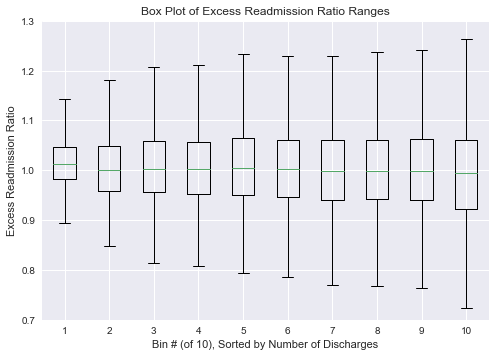

In [90]:
plt.boxplot([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10])
plt.ylim(0.7,1.3)
plt.title('Box Plot of Excess Readmission Ratio Ranges')
plt.xlabel('Bin # (of 10), Sorted by Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()

<i>After splitting the datapoints into 10 relatively even batches, we can see that while the <b>median</b> values do trend lower, the increasing variance in values for <b>Excess Readmission Ratio</b> as <b>Number of Discharges</b> increase does cast a little bit of doubt over whether the above recommendations are robust.</i>
<p>
<i>We will look at more specific measures to see if there is a notable difference amongst them.</i>

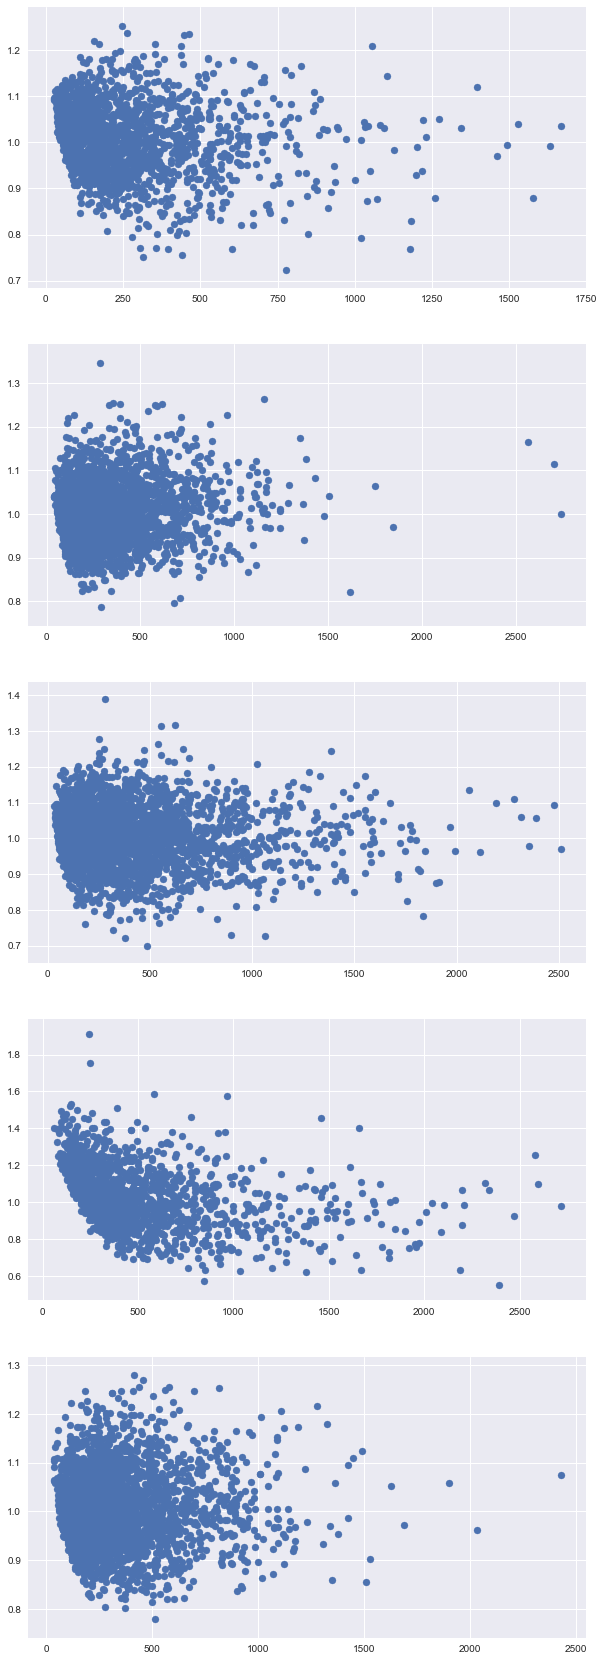

In [79]:
meas_df = clean_hospital_read_df.iloc[81:-3]
meas_1_cond = meas_df['Measure Name'] == 'READM-30-AMI-HRRP'
meas_2_cond = meas_df['Measure Name'] == 'READM-30-COPD-HRRP'
meas_3_cond = meas_df['Measure Name'] == 'READM-30-HF-HRRP'
meas_4_cond = meas_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'
meas_5_cond = meas_df['Measure Name'] == 'READM-30-PN-HRRP'
df_meas_1 = meas_df[meas_1_cond]
df_meas_2 = meas_df[meas_2_cond]
df_meas_3 = meas_df[meas_3_cond]
df_meas_4 = meas_df[meas_4_cond]
df_meas_5 = meas_df[meas_5_cond]

fig, ax = plt.subplots(5, 1, figsize=(10,30))
ax[0].scatter(df_meas_1['Number of Discharges'],df_meas_1['Excess Readmission Ratio'])
ax[1].scatter(df_meas_2['Number of Discharges'],df_meas_2['Excess Readmission Ratio'])
ax[2].scatter(df_meas_3['Number of Discharges'],df_meas_3['Excess Readmission Ratio'])
ax[3].scatter(df_meas_4['Number of Discharges'],df_meas_4['Excess Readmission Ratio'])
ax[4].scatter(df_meas_5['Number of Discharges'],df_meas_5['Excess Readmission Ratio'])

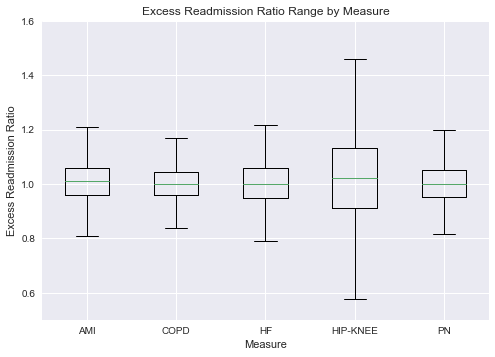

In [116]:
plt.boxplot([df_meas_1['Excess Readmission Ratio'],df_meas_2['Excess Readmission Ratio'],df_meas_3['Excess Readmission Ratio'],df_meas_4['Excess Readmission Ratio'],df_meas_5['Excess Readmission Ratio']])
plt.ylim(0.5,1.6)
xlabels = ['AMI','COPD','HF','HIP-KNEE','PN']
plt.xticks([1,2,3,4,5],xlabels)
plt.title('Excess Readmission Ratio Range by Measure')
plt.xlabel('Measure')
plt.ylabel('Excess Readmission Ratio')
plt.show()

In [85]:
print('Mean Values by Measure')
print(meas_df.groupby("Measure Name").mean()['Excess Readmission Ratio'])
print('Median Values by Measure')
print(meas_df.groupby("Measure Name").median()['Excess Readmission Ratio'])
print('Standard Deviation by Measure')
print(meas_df.groupby("Measure Name").std()['Excess Readmission Ratio'])

Mean Values by Measure
Measure Name
READM-30-AMI-HRRP         1.007526
READM-30-COPD-HRRP        1.004288
READM-30-HF-HRRP          1.003429
READM-30-HIP-KNEE-HRRP    1.028160
READM-30-PN-HRRP          1.004785
Name: Excess Readmission Ratio, dtype: float64
Median Values by Measure
Measure Name
READM-30-AMI-HRRP         1.0091
READM-30-COPD-HRRP        1.0010
READM-30-HF-HRRP          1.0014
READM-30-HIP-KNEE-HRRP    1.0233
READM-30-PN-HRRP          0.9998
Name: Excess Readmission Ratio, dtype: float64
Standard Deviation by Measure
Measure Name
READM-30-AMI-HRRP         0.075921
READM-30-COPD-HRRP        0.066235
READM-30-HF-HRRP          0.081258
READM-30-HIP-KNEE-HRRP    0.169573
READM-30-PN-HRRP          0.076191
Name: Excess Readmission Ratio, dtype: float64


In [86]:
meas_kh_cond = meas_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'
meas_non_kh_cond = meas_df['Measure Name'] != 'READM-30-HIP-KNEE-HRRP'

print("T test:",stats.ttest_ind(meas_df[meas_kh_cond]['Excess Readmission Ratio'],meas_df[meas_non_kh_cond]['Excess Readmission Ratio'],nan_policy='omit'))

T test: Ttest_indResult(statistic=8.8736161628579904, pvalue=8.1258683544898448e-19)


<i>The measure <b>READM-30-HIP-KNEE-HRRP</b>, representing the measurements for Hip/Knee Replacements, shows significant difference (at $\alpha$ = .01) with respect to the mean and standard deviation relative to the other measures when it comes to <b>Excess Readmissions Ratio</b>.</i>
<p>
<i>The <b>key</b> recommendation would be to further investigate the causes of readmissions for Hip/Knee Replacement. As there is the widest variation in this measure, a collaborative effort should be made between the leading hospitals (that is those with low ratios) and the lagging ones to ensure that a consistent set of practices is followed based on the leading hospitals. The cost of such colloboration is minimal compared to the initial recommendaton while the benefits can easily be measured within a reasonable timeframe (ie. a year).</i>
<p>
<i>There are other opportunities for improving the <b>Excess Readmission Ratio</b>, but the above recommendation should provide the greatest impact at minimal cost.</i>